In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

from pandas import set_option
#set_option('precision',5)
pd.options.display.float_format = '{:.5f}'.format

In [2]:
#dataset = pd.read_csv('yahoostocks.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
dataset = pd.read_csv('GoldPrize.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
# check for the null values
dataset['Close'].dropna(inplace=True)
dataset.describe(include = 'all')

#dataset['Close'].dropna(inplace=True) 

,Open,High,Low,Close,Adj Close,Volume
count,2373.00000,2373.00000,2373.00000,2373.00000,2373.00000,2373.00000
mean,1375.87122,1382.96127,1368.11635,1375.68862,1375.68862,2097516.32280
std,188.54428,190.58497,185.85117,188.44132,188.44132,15026919.12584
min,1053.69995,1062.00000,1046.19995,1050.80005,1050.80005,0.00000
25%,1238.40002,1243.90002,1231.80005,1238.30005,1238.30005,36.00000
50%,1310.69995,1315.59998,1306.09998,1310.69995,1310.69995,138.00000
75%,1525.00000,1533.09998,1514.69995,1524.50000,1524.50000,500.00000
max,1909.00000,1911.59998,1864.00000,1888.69995,1888.69995,230724452.00000


In [4]:
data = dataset.filter(['Close'])
data.dropna(inplace=True)
data.isna().any()
#data

Close    False
dtype: bool

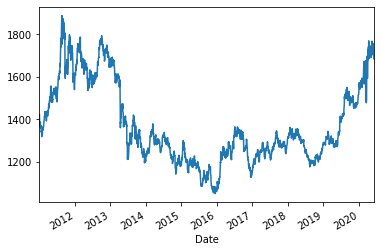

In [5]:
dataset['Close'].plot(kind='line')

Date
2011-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2011-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2011-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2011-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2011-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
2020-02-29    AxesSubplot(0.125,0.2;0.775x0.68)
2020-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
Length: 114, dtype: object

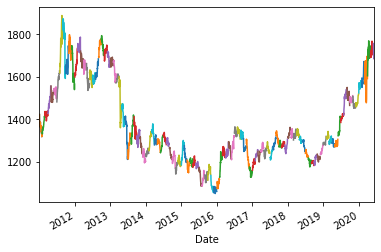

In [6]:
dataset['Close'].resample('M').plot(kind='line')

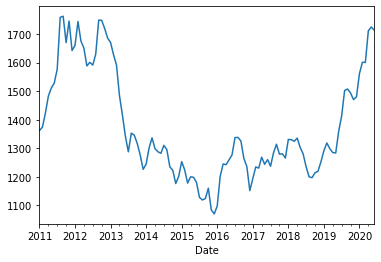

In [7]:
dataset['Close'].resample('M').mean().plot(kind='line')

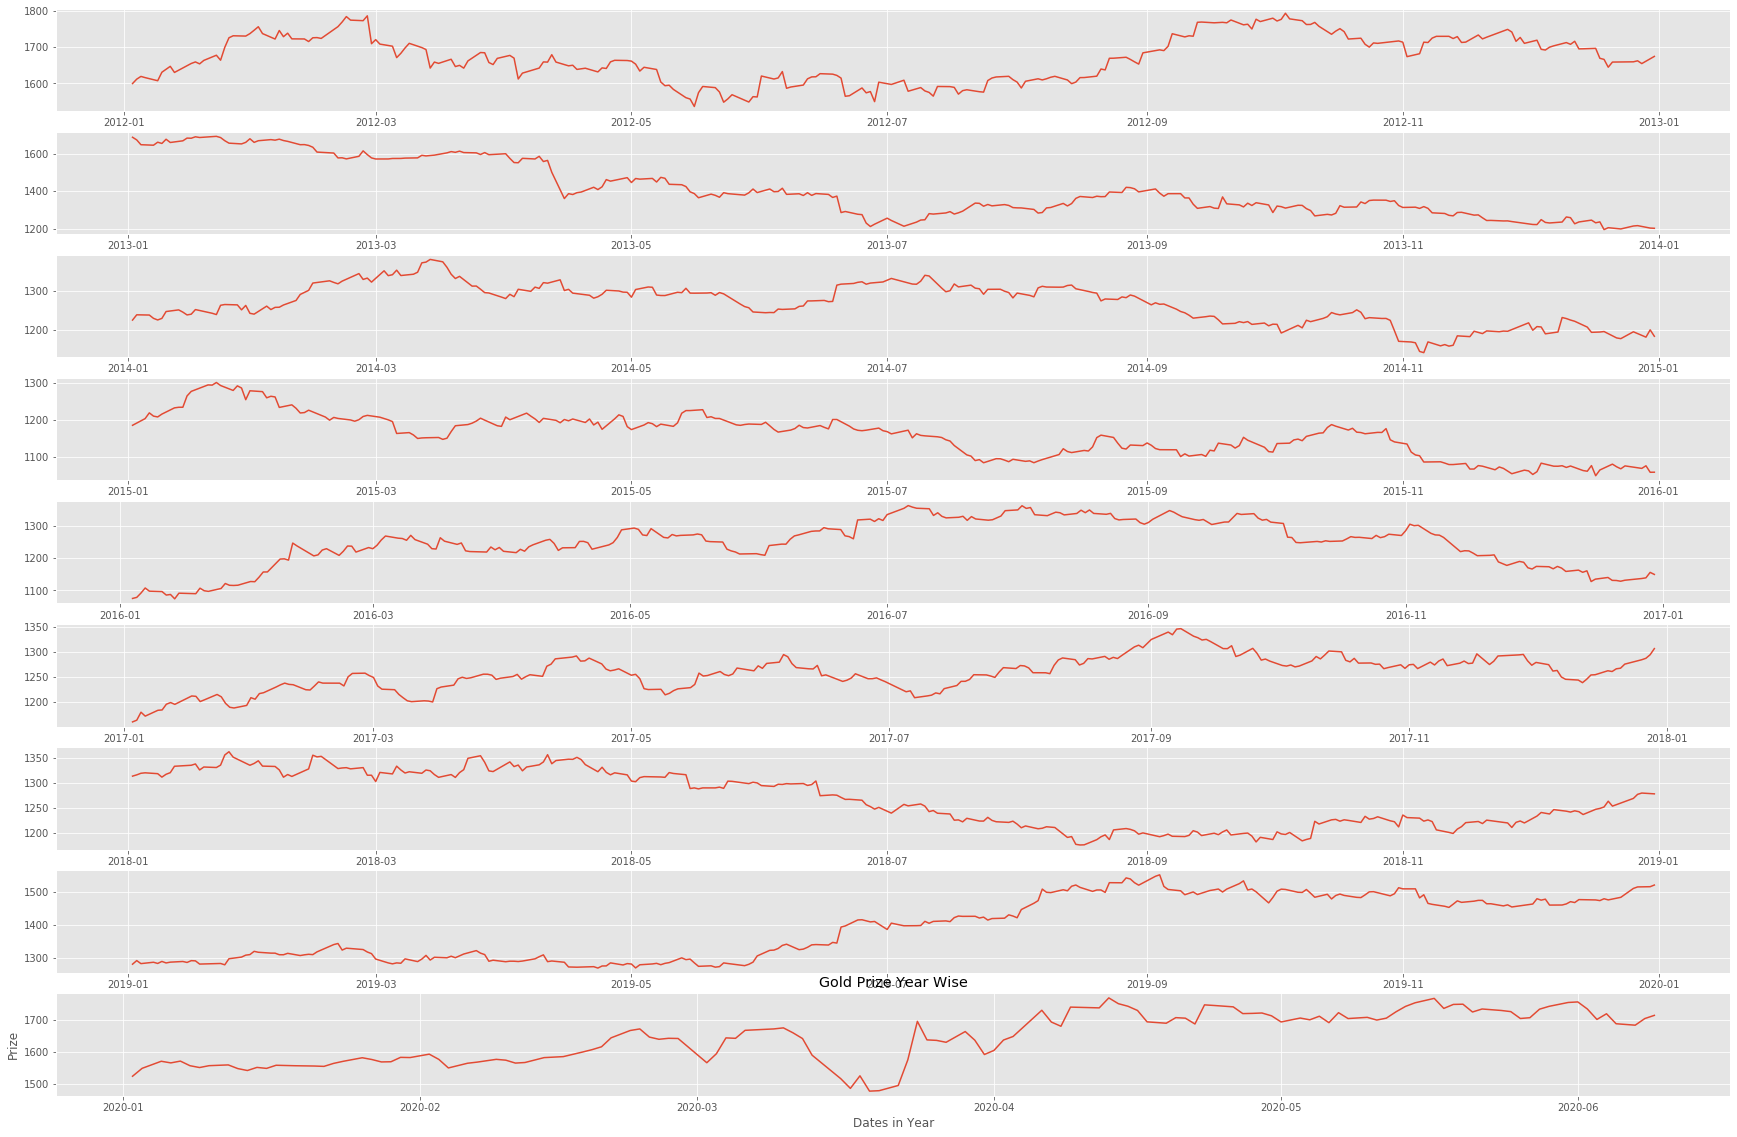

In [11]:
from matplotlib import style
fig = plt.figure()

ax1 = fig.add_subplot(911)
ax2 = fig.add_subplot(912)
ax3 = fig.add_subplot(913)
ax4 = fig.add_subplot(914)
ax5 = fig.add_subplot(915)
ax6 = fig.add_subplot(916)
ax7 = fig.add_subplot(917)
ax8 = fig.add_subplot(918)
ax9 = fig.add_subplot(919)

style.use("ggplot")

data2012 = data['2012']
index2012 = data['2012'].index
ax1.plot(index2012,data2012)

data2013 = data['2013']
index2013 = data['2013'].index
ax2.plot(index2013,data2013)

data2014 = data['2014']
index2014 = data['2014'].index
ax3.plot(index2014,data2014)

data2015 = data['2015']
index2015 = data['2015'].index
ax4.plot(index2015,data2015)

data2016 = data['2016']
index2016 = data['2016'].index
ax5.plot(index2016,data2016)

data2017 = data['2017']
index2017 = data['2017'].index
ax6.plot(index2017,data2017)

data2018 = data['2018']
index2018 = data['2018'].index
ax7.plot(index2018,data2018)

data2019 = data['2019']
index2019 = data['2019'].index
ax8.plot(index2019,data2019)

data2020 = data['2020']
index2020 = data['2020'].index
ax9.plot(index2020,data2020)

plt.title("Gold Prize Year Wise")
plt.rcParams['figure.figsize']=30,20
plt.xlabel("Dates in Year")
plt.ylabel("Prize")
plt.grid(True,alpha=1)
plt.show()

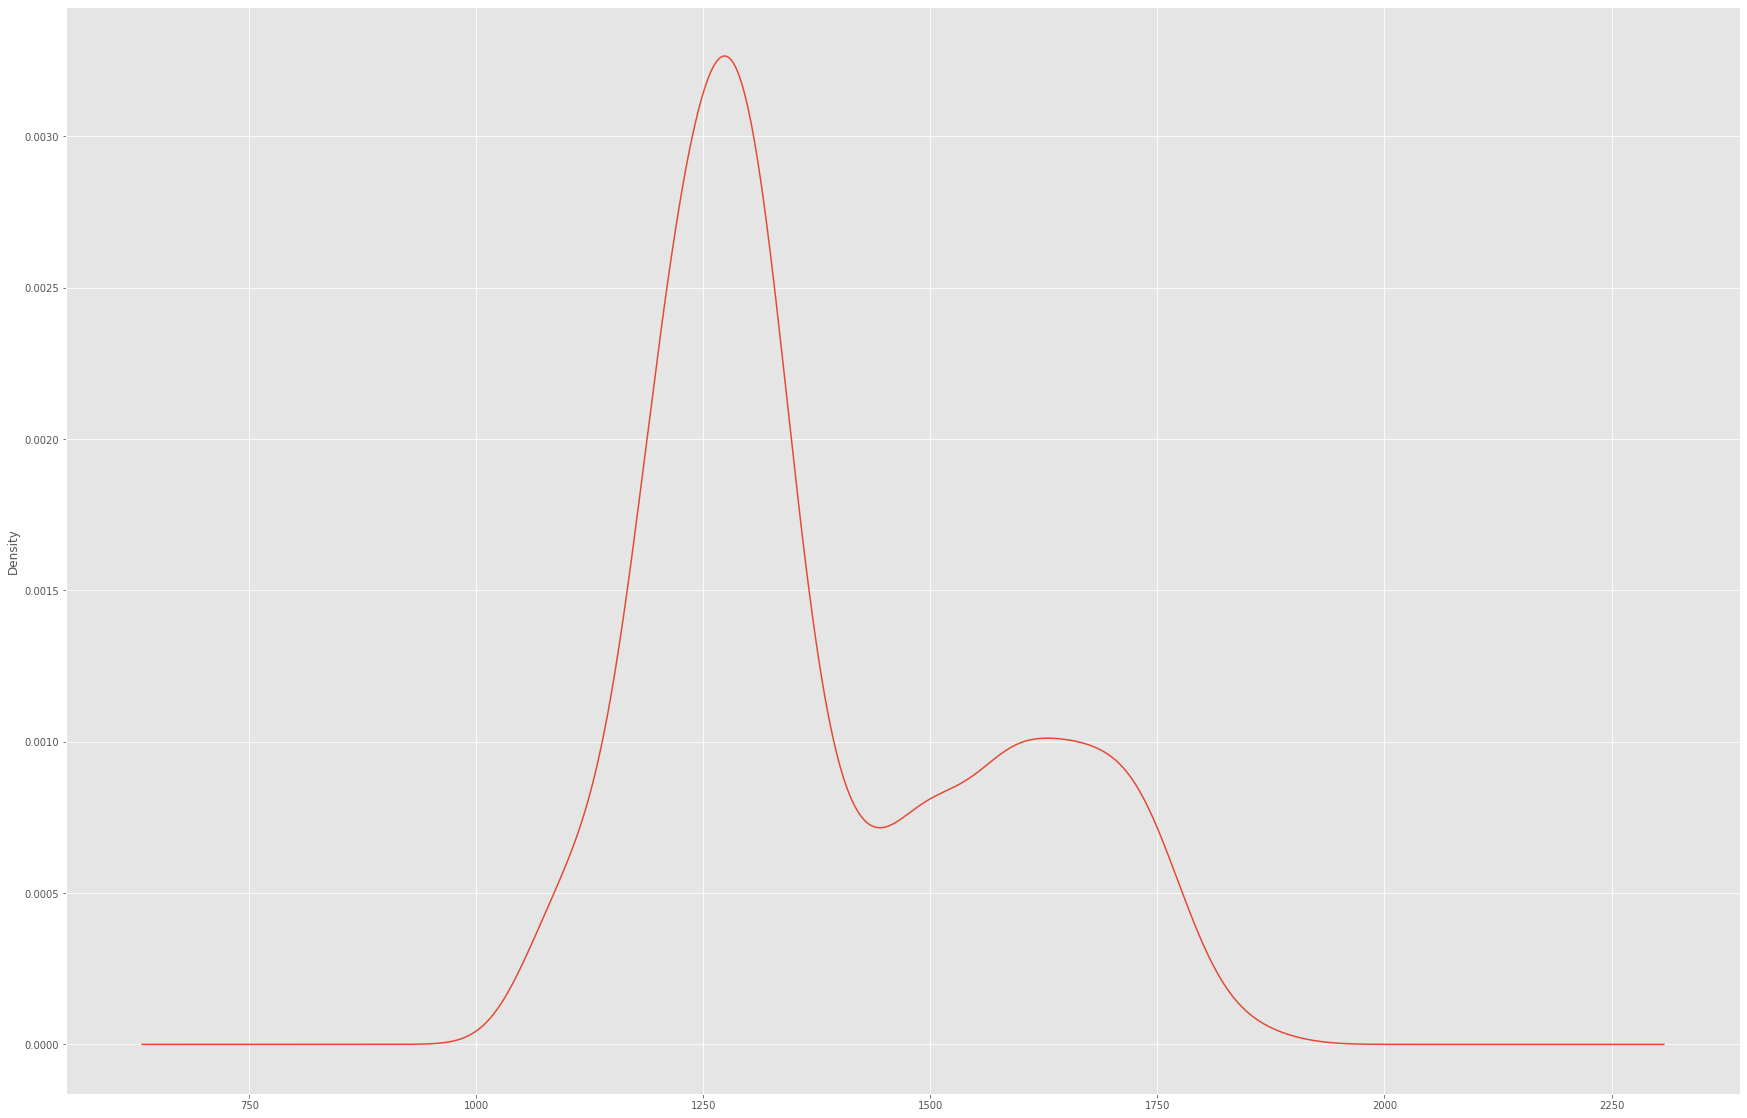

In [9]:
dataset['Close'].plot(kind='kde')

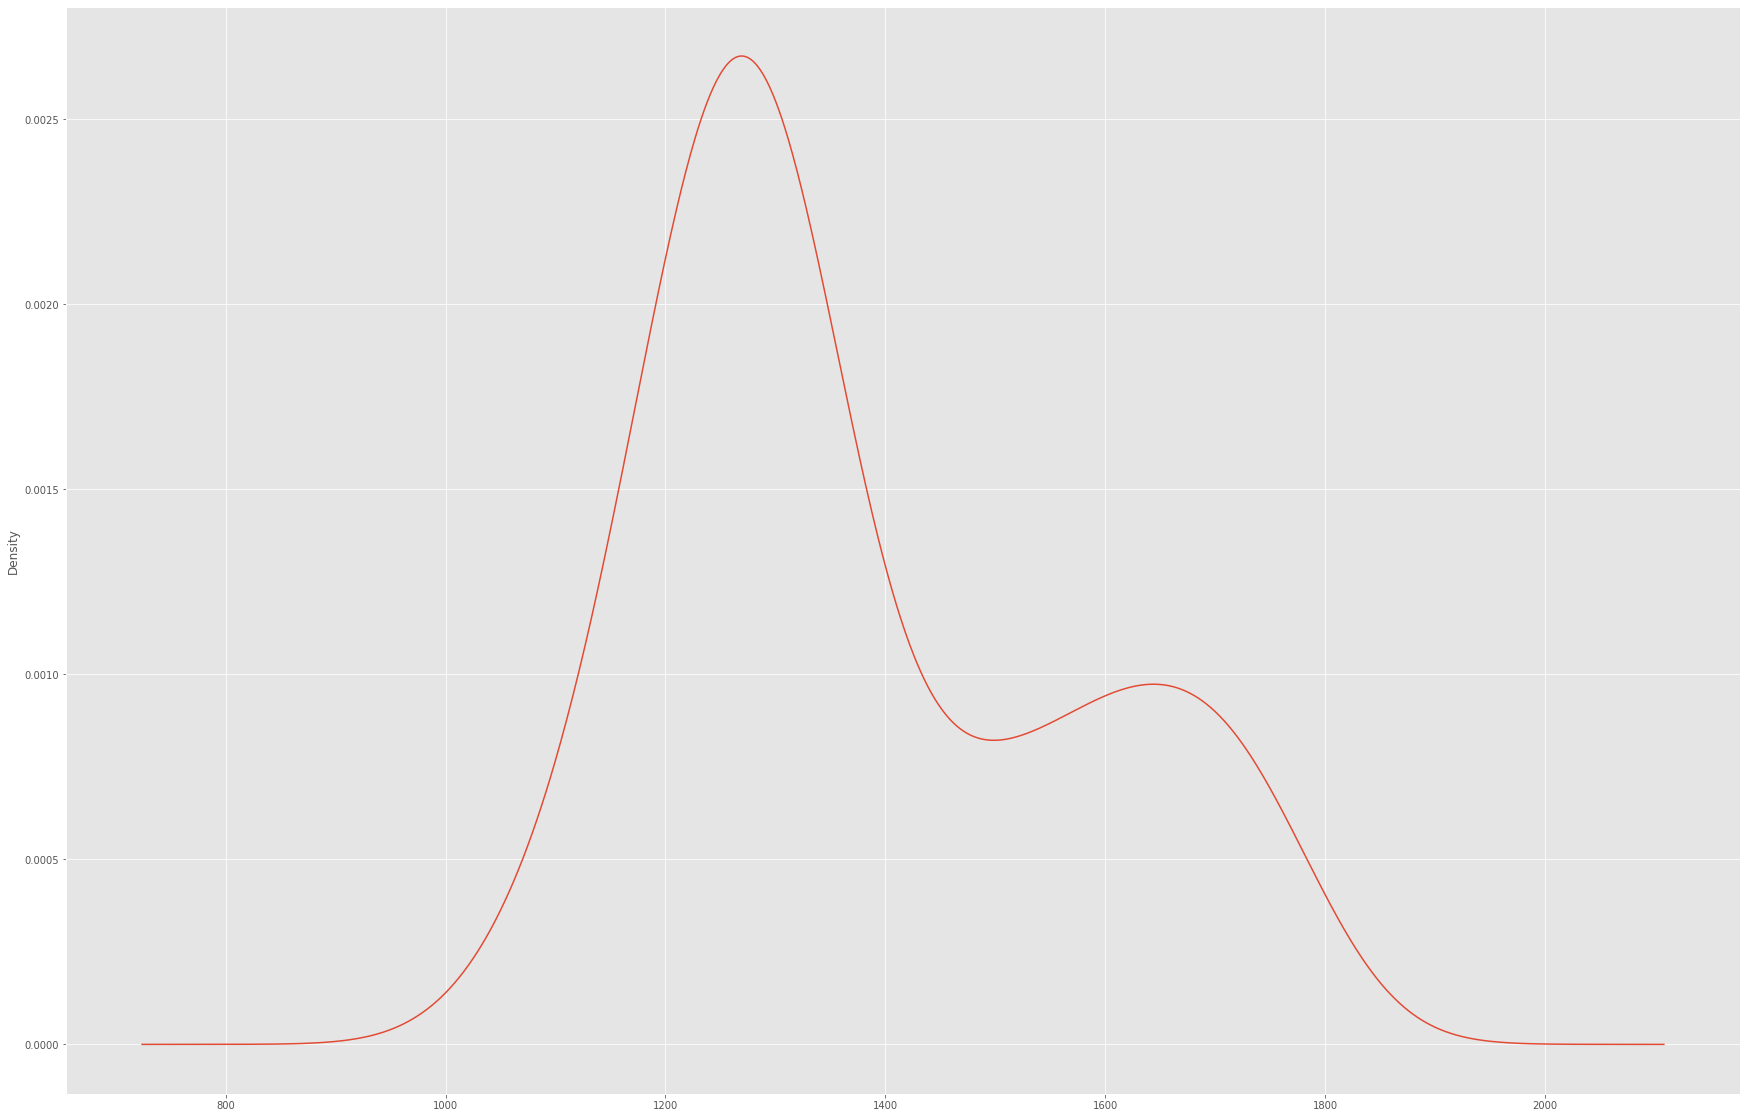

In [10]:
dataset['Close'].resample('M').mean().plot(kind='kde')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [12]:
data_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))
datalen = int((len(data)*0.8))

train_data_scaled = data_scaled[0:datalen]
test_data_scaled = data_scaled[datalen:]

In [13]:
train_data_scaled.shape, test_data_scaled.shape,len(data)

((1898, 1), (475, 1), 2373)

In [14]:
#creating a method for testing the data

def create_train_test_data(data,time_step=90):
    X_data, Y_data = [],[]
    for i in range(len(data) - time_step - 1):
        a = data[i:(i+time_step),0]
        b = data[i+time_step,0]
        X_data.append(a)
        Y_data.append(b)
    return np.array(X_data) , np.array(Y_data)

In [15]:
time_step = 100
X_train, Y_train = create_train_test_data(train_data_scaled,time_step)
X_test, Y_test = create_train_test_data(test_data_scaled,time_step)

In [16]:
# before implementing LSTM model we need to change our shape into 3-D
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1], 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [53]:
# creating a stacked LSTM model for prediction
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,kernel_initializer = "he_uniform",activation='relu',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50,kernel_initializer = "glorot_uniform",activation='sigmoid'))
model.add(Dropout(0.2))
#model.add(Dense(25))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [54]:
# now fitting the model

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs = 100, batch_size = 64,verbose =2)

Epoch 1/100
29/29 - 5s - loss: 0.2659 - val_loss: 0.0339
Epoch 2/100
29/29 - 4s - loss: 0.0954 - val_loss: 0.0233
Epoch 3/100
29/29 - 4s - loss: 0.0827 - val_loss: 0.0108
Epoch 4/100
29/29 - 4s - loss: 0.0644 - val_loss: 0.0025
Epoch 5/100
29/29 - 4s - loss: 0.0575 - val_loss: 0.0021
Epoch 6/100
29/29 - 4s - loss: 0.0505 - val_loss: 0.0032
Epoch 7/100
29/29 - 4s - loss: 0.0458 - val_loss: 0.0073
Epoch 8/100
29/29 - 4s - loss: 0.0429 - val_loss: 0.0036
Epoch 9/100
29/29 - 4s - loss: 0.0386 - val_loss: 0.0032
Epoch 10/100
29/29 - 4s - loss: 0.0290 - val_loss: 0.0089
Epoch 11/100
29/29 - 4s - loss: 0.0209 - val_loss: 0.0075
Epoch 12/100
29/29 - 4s - loss: 0.0155 - val_loss: 0.0031
Epoch 13/100
29/29 - 4s - loss: 0.0152 - val_loss: 0.0046
Epoch 14/100
29/29 - 4s - loss: 0.0106 - val_loss: 0.0026
Epoch 15/100
29/29 - 5s - loss: 0.0088 - val_loss: 0.0039
Epoch 16/100
29/29 - 4s - loss: 0.0076 - val_loss: 0.0049
Epoch 17/100
29/29 - 4s - loss: 0.0074 - val_loss: 0.0041
Epoch 18/100
29/29 - 4s

In [55]:
# prediction
train_predict_scaled = model.predict(X_train)
test_predict_scaled = model.predict(X_test)

In [56]:
# transform the data into original form 
# note: we have converted the data using minmaxscalar
train_predict = scaler.inverse_transform(train_predict_scaled)
test_predict = scaler.inverse_transform(test_predict_scaled)

In [57]:
# checking model performance
from sklearn.metrics import mean_squared_error,r2_score
print("Training MSE: ", mean_squared_error(Y_train,train_predict))
print("Training RMSE: ", np.sqrt(mean_squared_error(Y_train,train_predict)))
print()
print("Testing MSE: ", mean_squared_error(Y_test,test_predict))
print("Testing RMSE: ", np.sqrt(mean_squared_error(Y_test,test_predict)))

Training MSE:  1857440.8464177349
Training RMSE:  1362.8796155265272

Testing MSE:  2157633.1664610705
Testing RMSE:  1468.8884118479084


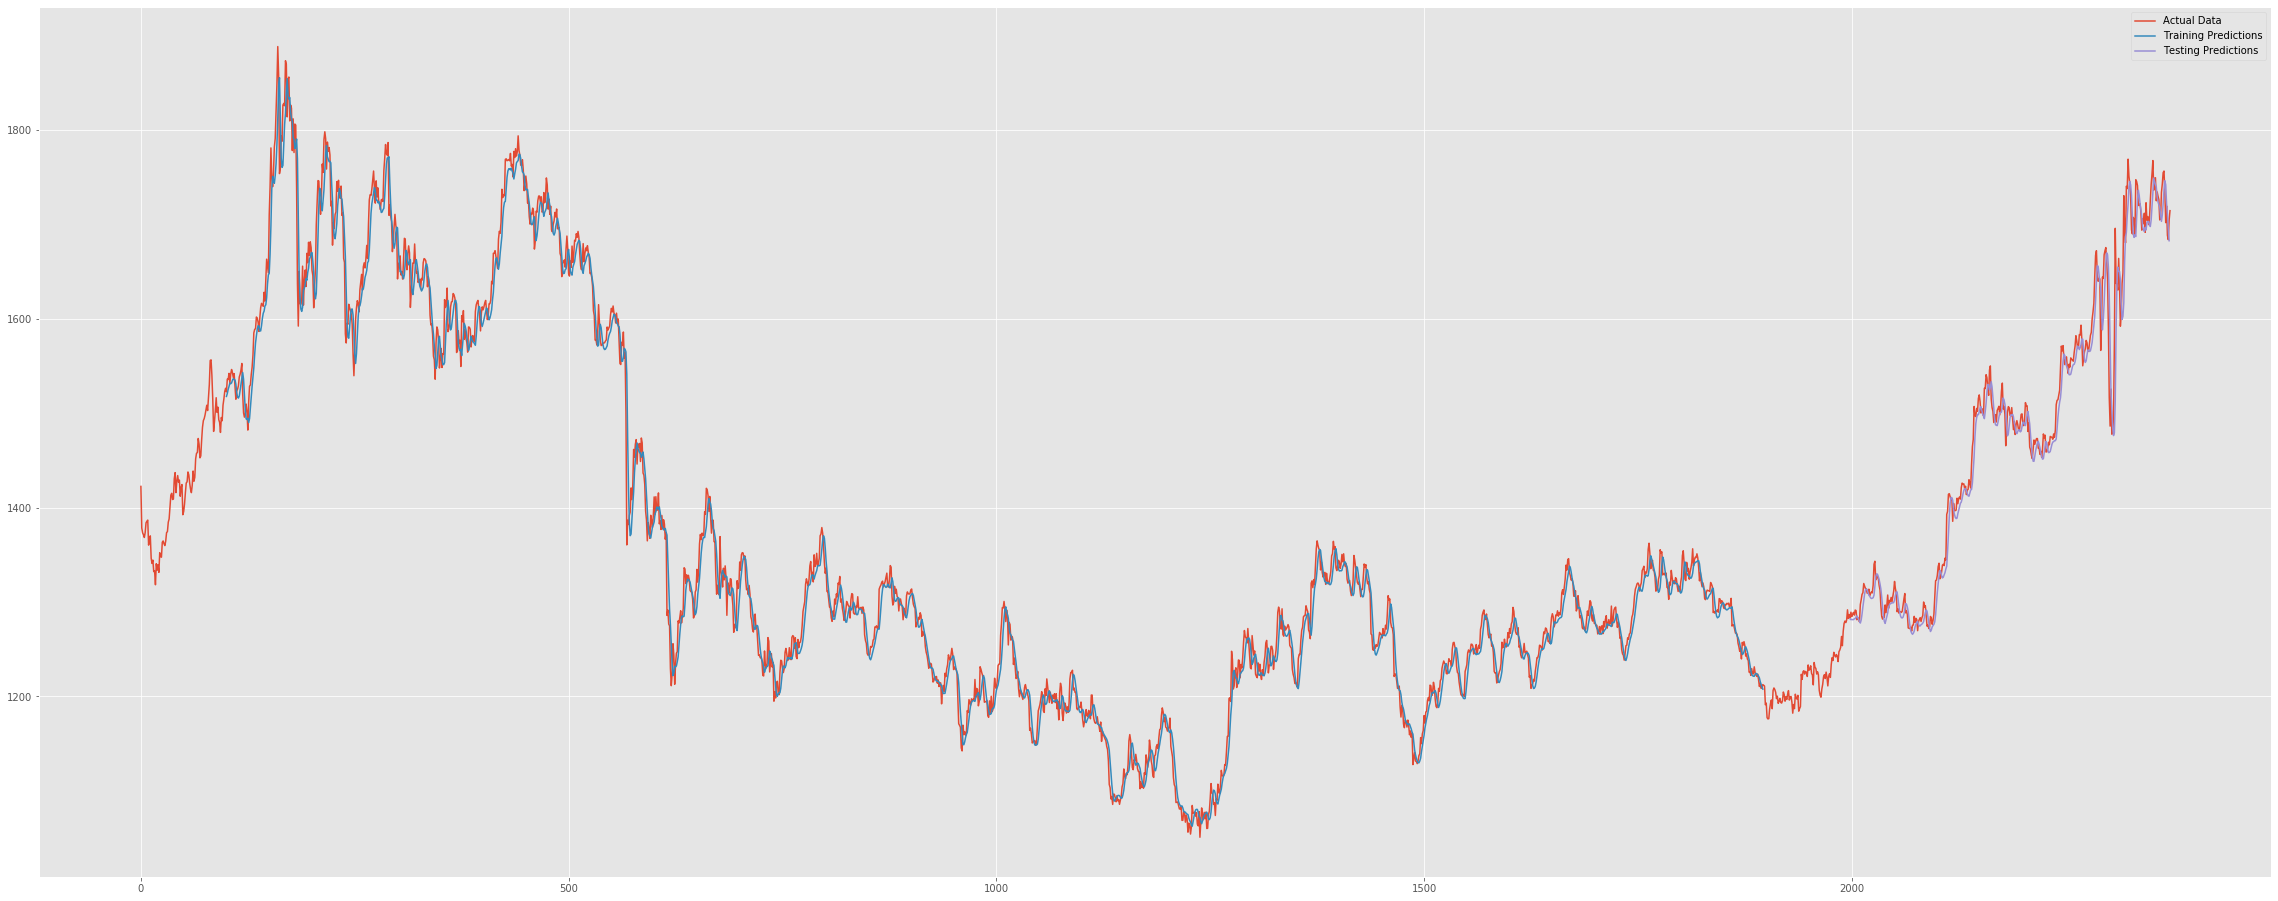

In [144]:
look_back = 100
# shift train predictions for plotting
trainPredictedPlot = np.empty_like(data_scaled)
trainPredictedPlot[:,:] = np.nan
trainPredictedPlot[look_back:len(train_predict)+look_back,:] = train_predict

# shift test predictions for plotting
testPredictedPlot = np.empty_like(data_scaled)
testPredictedPlot[:,:] = np.nan
testPredictedPlot[len(train_predict)+(look_back*2)+1:len(data_scaled)-1,:] = test_predict
# plotting graph
plt.plot(scaler.inverse_transform(data_scaled),label = 'Actual Data')
plt.plot(trainPredictedPlot,label = 'Training Predictions')
plt.plot(testPredictedPlot,label='Testing Predictions')
plt.legend(loc='best')
plt.show()

In [145]:
x_input = test_data_scaled[len(test_data_scaled)-100:].reshape(1,-1)
#x_input[0].tolist()
x_input.shape

(1, 100)

In [146]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [147]:
lst_output = []
n_steps = 100
i=0

while(i<30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,x_input.shape[1],1))
        yhat = model.predict(x_input)
        lst_output.extend(yhat.tolist())
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        i = i+1
        
    else:
        x_input = x_input.reshape((1,x_input.shape[1],1))
        yhat = model.predict(x_input)
        lst_output.extend(yhat.tolist())
        temp_input.extend(yhat[0].tolist())
        i = i+1

In [148]:
dt_new = np.arange(1,101)
dt_pred = np.arange(101,131)
#dt_pred = np.arange(101,101+365)

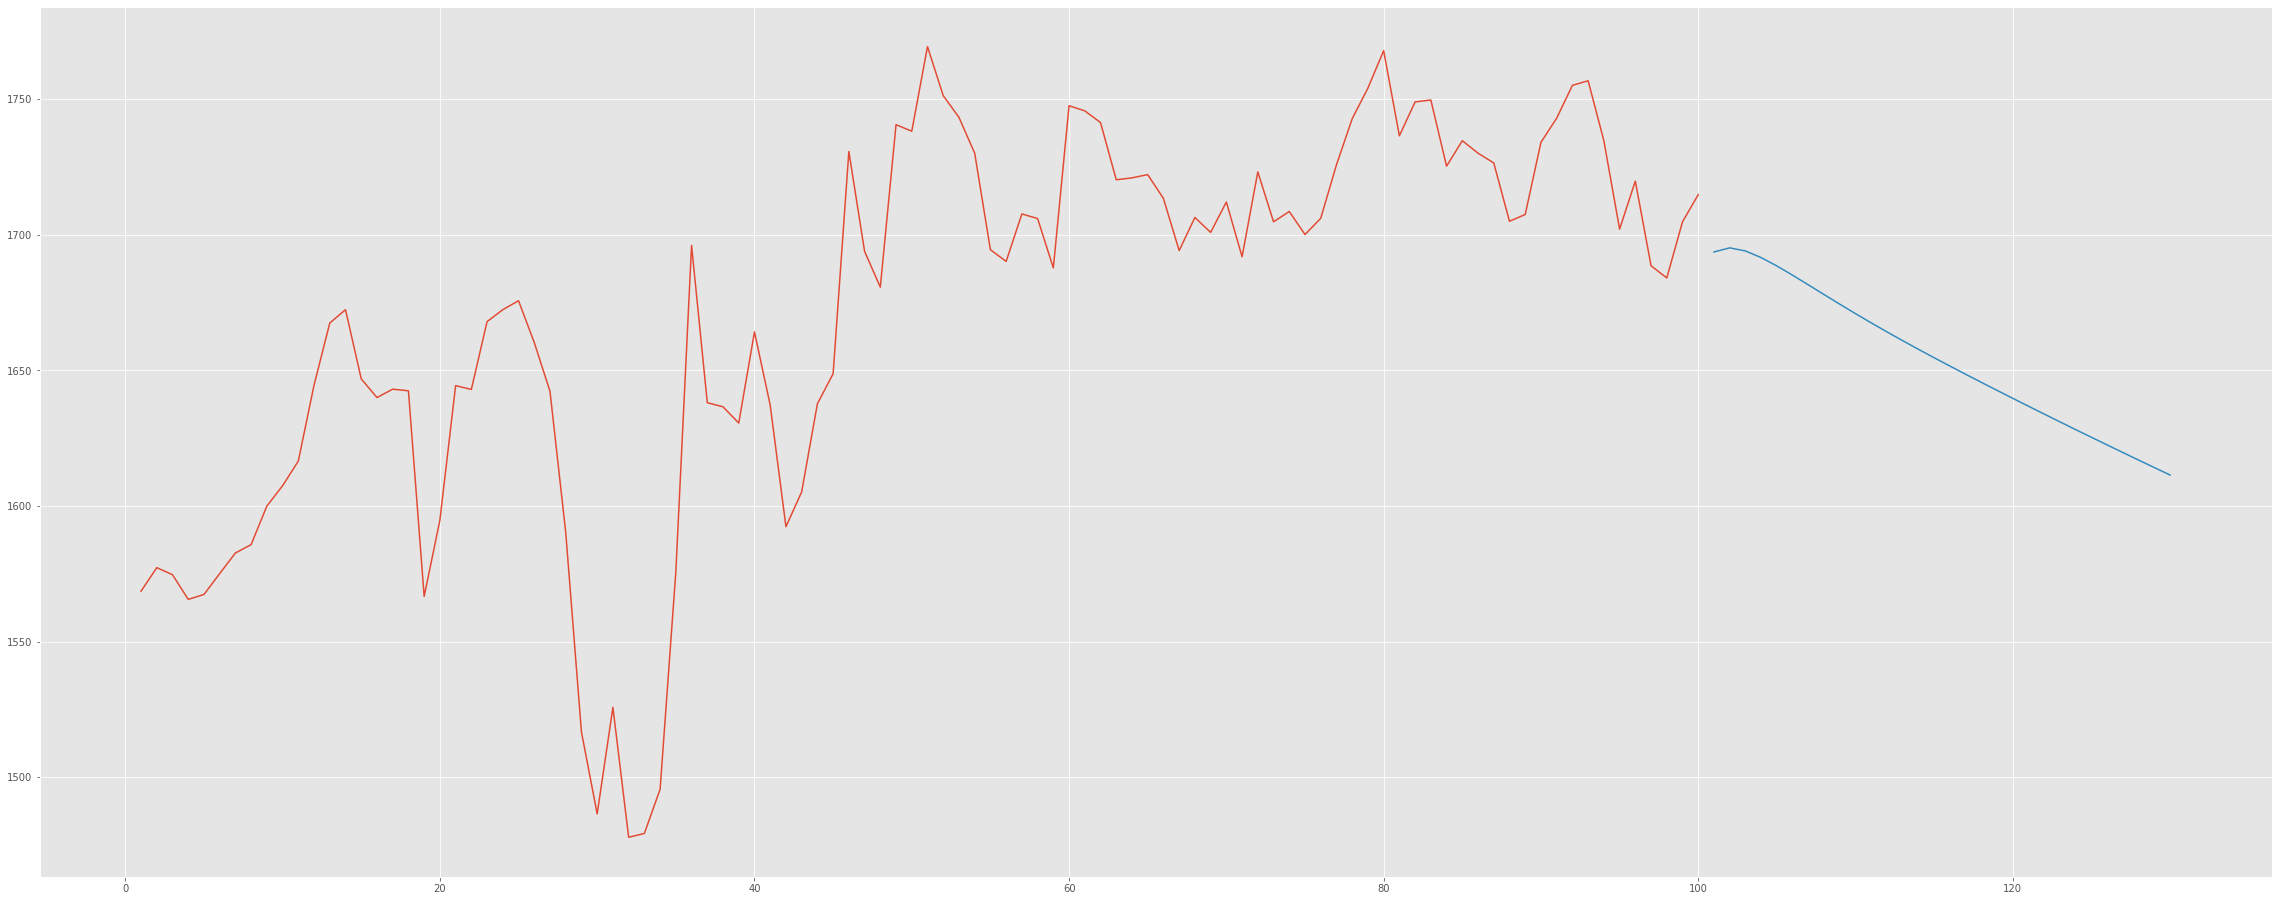

In [149]:
plt.plot(dt_new,scaler.inverse_transform(test_data_scaled[len(test_data_scaled)-100:]))
plt.plot(dt_pred,scaler.inverse_transform(lst_output))

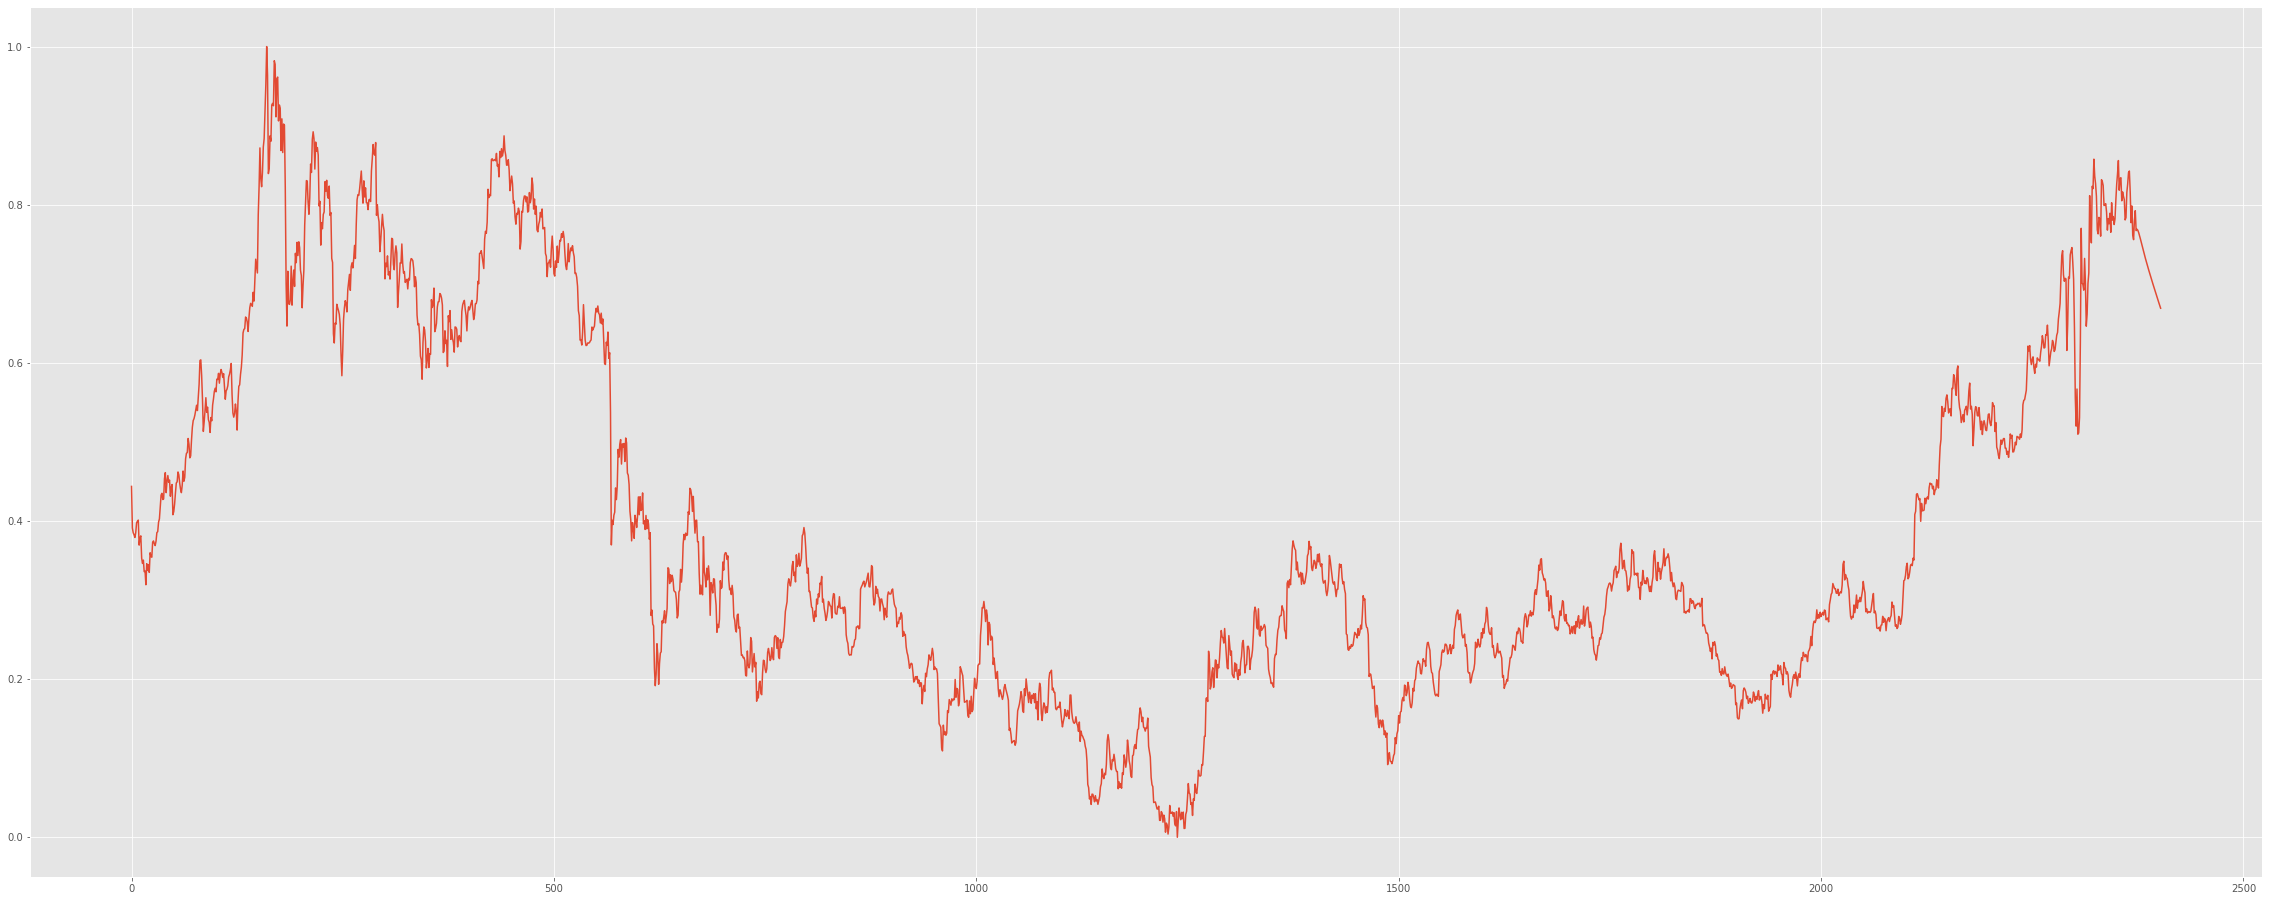

In [150]:
dfdata = data_scaled.tolist()
dfdata.extend(lst_output)
plt.plot(dfdata[:])